# EN3160 Assignment 1 

## Question 01
Implement the intensity transformation depicted in Fig.a on the image shown in Fig.b.
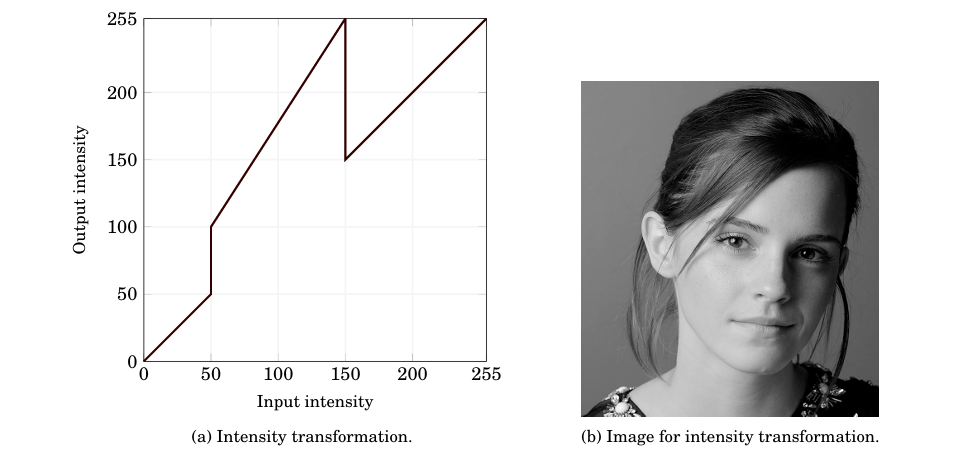

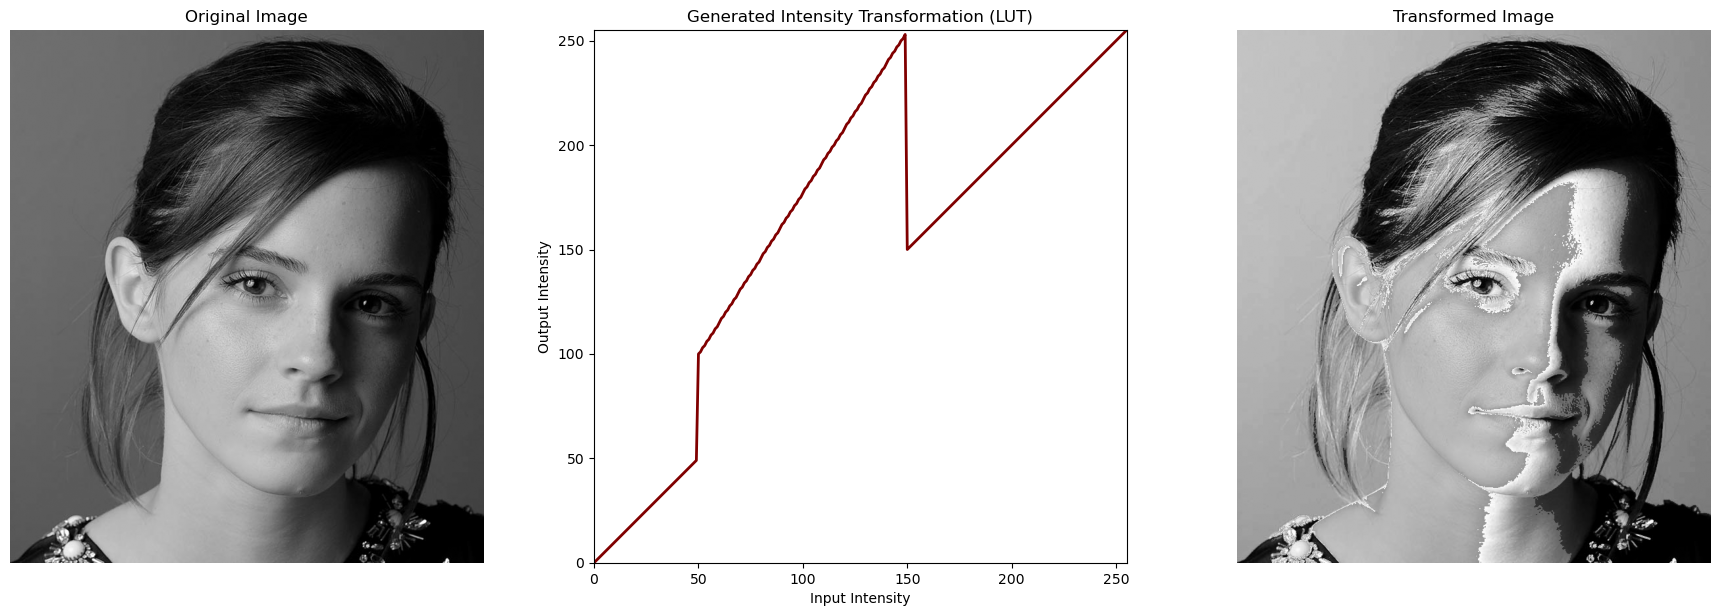

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale format.
if img1 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

# Create a Lookup Table (LUT) to store the piecewise function
lut = np.zeros(256, dtype=np.uint8)

for r in range(256):
    if r < 50:
        s = r
    elif r < 150:
        s = 1.55 * r + 22.5
    else:
        s = r  # for r >= 150

    lut[r] = np.clip(s, 0, 255) # limit the s values between 0 and 255

transformed_img = cv2.LUT(img1, lut) # Applying LUT

# Displaying results
fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].plot(lut, color='maroon', linewidth=2)
axs[1].set_title('Generated Intensity Transformation (LUT)')
axs[1].set_xlabel('Input Intensity')
axs[1].set_ylabel('Output Intensity')
axs[1].set_xlim([0, 255])
axs[1].set_ylim([0, 255])
axs[1].set_aspect('equal') # make the plot square-shaped

axs[2].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Transformed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


## Question 02
Apply a similar operation as above (question 1) to accentuate  
 (a) white matter  
 (b) gray matter  
 in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.  
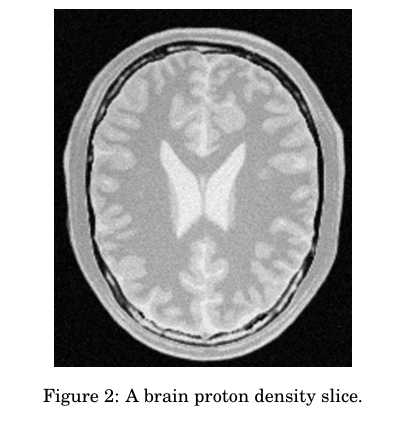

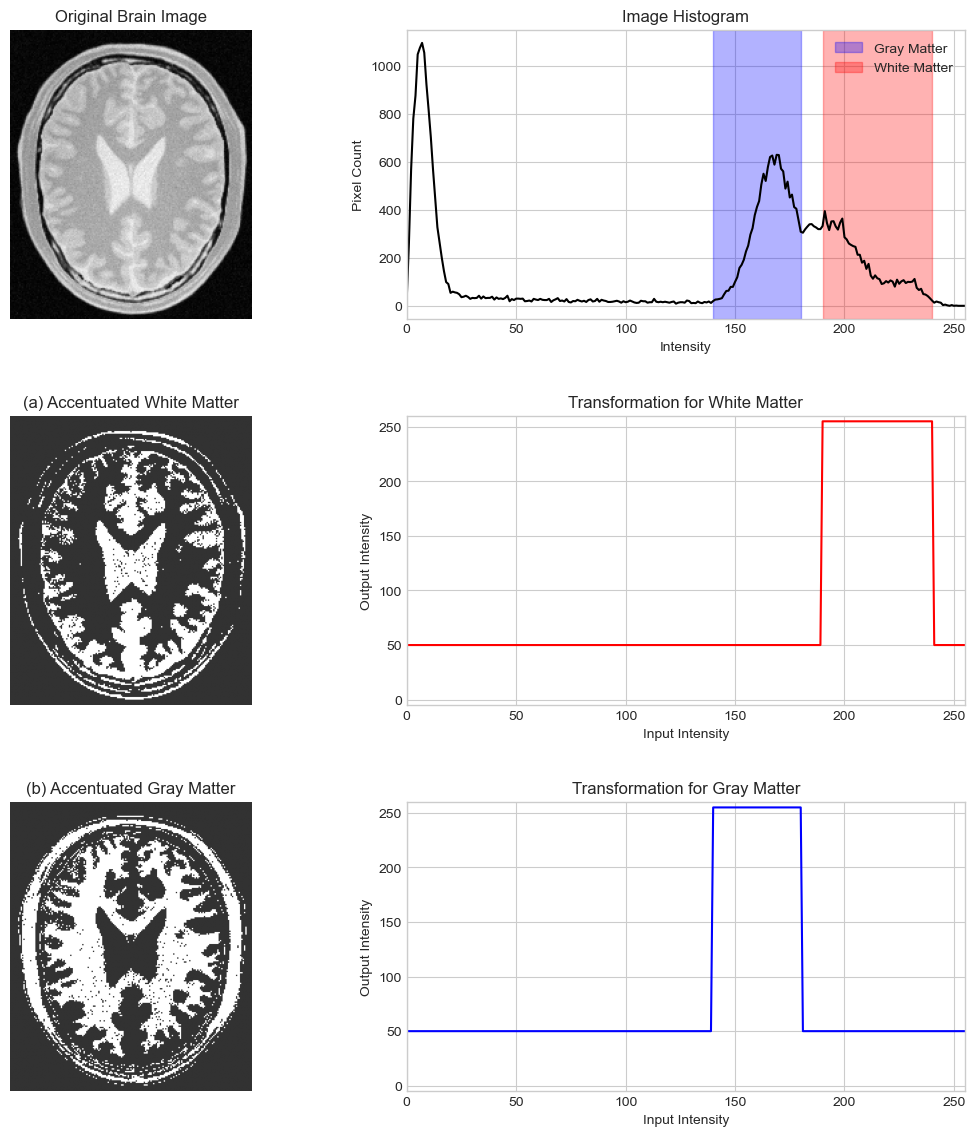

In [11]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
if img2 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

hist = cv2.calcHist([img2], [0], None, [256], [0, 256])

gray_matter_range = (140, 180)
white_matter_range = (190, 240)

high_intensity = 255
low_intensity = 50

lut_white = np.full(256, low_intensity, dtype=np.uint8)
lut_white[white_matter_range[0] : white_matter_range[1] + 1] = high_intensity

lut_gray = np.full(256, low_intensity, dtype=np.uint8)
lut_gray[gray_matter_range[0] : gray_matter_range[1] + 1] = high_intensity

white_accentuated_img = cv2.LUT(img2, lut_white)
gray_accentuated_img = cv2.LUT(img2, lut_gray)

plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(3, 2, 1)
ax1.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Brain Image')
ax1.axis('off')

ax2 = plt.subplot(3, 2, 2)
ax2.plot(hist, color='black')
ax2.set_title('Image Histogram')
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Pixel Count')
ax2.axvspan(gray_matter_range[0], gray_matter_range[1], color='blue', alpha=0.3, label='Gray Matter')
ax2.axvspan(white_matter_range[0], white_matter_range[1], color='red', alpha=0.3, label='White Matter')
ax2.legend()
ax2.set_xlim([0, 255])

ax3 = plt.subplot(3, 2, 3)
ax3.imshow(white_accentuated_img, cmap='gray', vmin=0, vmax=255)
ax3.set_title('(a) Accentuated White Matter')
ax3.axis('off')

ax4 = plt.subplot(3, 2, 4)
ax4.plot(lut_white, color='red')
ax4.set_title('Transformation for White Matter')
ax4.set_xlabel('Input Intensity')
ax4.set_ylabel('Output Intensity')
ax4.set_xlim([0, 255])
ax4.set_ylim([-5, 260])

ax5 = plt.subplot(3, 2, 5)
ax5.imshow(gray_accentuated_img, cmap='gray', vmin=0, vmax=255)
ax5.set_title('(b) Accentuated Gray Matter')
ax5.axis('off')

ax6 = plt.subplot(3, 2, 6)
ax6.plot(lut_gray, color='blue')
ax6.set_title('Transformation for Gray Matter')
ax6.set_xlabel('Input Intensity')
ax6.set_ylabel('Output Intensity')
ax6.set_xlim([0, 255])
ax6.set_ylim([-5, 260])

plt.tight_layout(pad=3.0)
plt.show()
